<a href="https://colab.research.google.com/github/BentheBurema/TM10007_ML_Project_group14/blob/main/Performed_on_testset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment Group 14 Dataset 2


## Importing libraries

In [176]:
# Basic packages
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

# Inspecting dataset
from scipy.stats import kstest

# Splitting dataset
from sklearn import model_selection

# Pre-processing
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split, cross_val_score
from scipy.stats import linregress, uniform, skew, kurtosis, norm

# Classifiers
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, fbeta_score, classification_report, auc, roc_curve, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from tabulate import tabulate


In [3]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done


## Data loading


In [134]:
# Data loading functions.
!git clone https://github.com/BentheBurema/TM10007_ML_Project_group14.git # ik snap niet waarom we dit doen? timo
from worcliver.load_data import load_data
data = load_data()

fatal: destination path 'TM10007_ML_Project_group14' already exists and is not an empty directory.


## Inspecting data

In [135]:
# Finding the number of missing and incorrect values
print(f"Number of None types: {data.isnull().sum().sum()}")     # Count number of None types
print(f"Number of NaN values: {data.isna().sum().sum()}")       # Count number of NaN values
print(f'The number of samples: {len(data.index)}')              # print number of samples, features and feature names
print(f'The number of features: {len(data.columns)}')

# Check if the dataset is balanced
malignant = (data['label'] == 'malignant').sum()
print(f'The percentage of tumors that is malignant is {(malignant/len(data.index))*100}')

# Check if the data is normally distributed
Y = data['label']
X = data.drop('label', axis=1)

p_values = {}
for key,values in X.items():

  #perform Kolmogorov-Smirnov test on the values and store the p_values
  _, p_value = kstest(values, 'norm')
  # Store the p-value in the dictionary
  p_values[key] = p_value

# Print the p-values
#for key, p_value in p_values.items():
    #print(f"{key}: {p_value}")

# If p<0.05 is not normally distributed, if p>0.05 it is normally distributed
count_less_than_005 = sum(p_value < 0.05 for p_value in p_values.values())
count_greater_than_005 = sum(p_value > 0.05 for p_value in p_values.values())

print(f"Amount of featuers not normally distributed: {count_less_than_005}")
print(f"Amount of features normally distributed: {count_greater_than_005}")

Number of None types: 0
Number of NaN values: 0
The number of samples: 186
The number of features: 494
The percentage of tumors that is malignant is 50.53763440860215
Amount of featuers not normally distributed: 493
Amount of features normally distributed: 0


## Splitting dataset in training set and test set


In [136]:
Y = data['label']
X = data.drop('label', axis=1)

# Split the dataset in training and test part
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
# Check if this is executed correctly
print("Amount samples in X_train (X_train):", X_train.shape[0])
print("Amount samples in X_test  (X_test):", X_test.shape[0])
print("Amount samples in Y_train (Y_train):", Y_train.shape[0])
print("Amount samples in Y_test (Y_test):", Y_test.shape[0])

display(X_train.head())

# Transform datasets to dataframes
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Amount samples in X_train (X_train): 148
Amount samples in X_test  (X_test): 38
Amount samples in Y_train (Y_train): 148
Amount samples in Y_test (Y_test): 38


,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
ID,,,,,,,,,,,,,,,,,,,,,
Liver-149_0,0.824583,0.055989,30.099345,4.415992,3.661071,1.861613,0.963279,0.022393,0.021571,0.011780,...,0.000000,0.104107,2.756906,8.453818,0.0,0,0.409805,222.558113,0.042636,11.809102
Liver-132_0,0.801146,0.092439,62.217271,5.375470,6.822246,2.509137,0.924549,0.049767,0.007751,0.002992,...,0.000000,0.100082,3.289330,11.458823,0.0,0,0.412003,2198.965478,0.000000,14.737962
Liver-018_0,0.784347,0.051682,29.057589,5.423131,8.776120,6.493751,0.967914,0.015269,0.035515,0.011933,...,0.015554,0.152348,1.301602,0.810392,0.0,0,0.526233,678.343564,0.211135,12.903202
Liver-135_0,0.762971,0.071214,39.719594,6.220513,8.349609,4.035151,0.944998,0.031507,0.028765,0.017286,...,0.000000,0.108344,1.929157,3.090863,0.0,0,0.391573,1168.726859,0.088960,14.316269
Liver-015_0,0.836579,0.075738,61.507831,7.303462,11.104662,3.733124,0.952526,0.027722,0.016664,0.011443,...,0.000000,0.078725,3.747019,15.215261,0.0,0,0.332604,1306.631943,0.000000,14.384808


## Preprocessing

### Delete features with more than 50% zeros

In [137]:
def delete_zeros(X_dataset):
  for column in X_dataset.columns:
    # Count amount of zeros in each column
    num_zeros = X_dataset[column].isin([0]).sum()

    # Calculate percentage of zeros in each column
    percentage_zeros = (num_zeros / len(X_dataset.index)) * 100

    # Check if there are more than 50% zeros in a column
    if percentage_zeros > 50:
        # Delete the column
        X_dataset.drop(column, axis=1, inplace=True)

  # Print the data shape before and after deleting features with >50% zeros
  print(f'The data shape after deleting features with >50% zeros: {X_dataset.shape}')
  return X_dataset

### Outliers

In [138]:
def define_outliers(X_dataset):
    outliers_total = 0
    for column in X_dataset.columns:
        sorted_feature = np.sort(X_dataset[column])  # Sort the values of the column
        Q1 = np.percentile(sorted_feature, 25)
        Q3 = np.percentile(sorted_feature, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outliers_total_column = ((sorted_feature < lower_bound) | (sorted_feature > upper_bound)).sum()
        outliers_total += outliers_total_column
    return outliers_total

### RobustScaling



In [139]:
# Function to scale the datasetusing RobustScaler because there are outliers and the features are not normally distributed
def scaling(X_dataset):
  scaler = RobustScaler(quantile_range=(0.1, 0.9)).fit(X_dataset) # first and last 10% of samples are seen as outliers
  scaler.fit(X_dataset)
  X_dataset_scaled = scaler.transform(X_dataset)
  X_dataset_scaled = pd.DataFrame(data=X_dataset_scaled, columns=X_dataset.columns)
  return X_dataset_scaled

### Remove zero variance

In [140]:
def zero_variance(X_dataset_scaled):
  # Remove features with zero variance
  vt = VarianceThreshold(threshold=0.0)
  X_dataset_var = vt.fit_transform(X_dataset_scaled)
  # Selecteer de juiste kolommen uit X_train_scaled
  selected_columns = X_dataset_scaled.columns[vt.get_support()]

  # Maak een DataFrame van de getransformeerde dataset met de geselecteerde kolomnamen
  X_dataset_var = pd.DataFrame(X_dataset_var, columns=selected_columns)
  print(f'The data shape before removing zero variance: {X_dataset_scaled.shape} and after: {X_dataset_var.shape}')
  return X_dataset_var

### ANOVA test

In [141]:
# Function to perform ANOVA test. ANOVA feature selection for numeric input and categorical output
def anova_analysis(X_dataset_var, Y_dataset):
  # define feature selection
  fs = SelectKBest(score_func=f_classif, k='all')

  # apply feature selection
  X_dataset_anova = fs.fit_transform(X_dataset_var, Y_dataset)
  X_dataset_anova = pd.DataFrame(data=X_dataset_anova, columns=X_dataset_var.columns)
  feature_scores = list(zip(fs.pvalues_, X_dataset_anova.columns))

  # Features selecteren met p-waarde kleiner dan 0.05, want dan is benigne significant verschillend van maligne
  selected_features = [feature[1] for feature in feature_scores if feature[0] < 0.05]

  # Filter de DataFrame om alleen geselecteerde features te behouden
  X_dataset_anova = X_dataset_anova[selected_features]
  print(f'The data shape before ANOVA: {X_dataset_var.shape} and after ANOVA: {X_dataset_anova.shape}')
  return X_dataset_anova

## RFECV

In [142]:
def function_calc_RFECV(X_dataset_anova, Y_dataset): # x_train_anova must be used as an argument here.

    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(Y_dataset)

    clf = SVC(kernel='linear',random_state=0)
    cv = StratifiedKFold(n_splits=5)
    min_features_to_select = 1
    rfecv = RFECV(estimator=clf,
                  step=5,
                  cv=cv,
                  scoring='roc_auc',
                  min_features_to_select=min_features_to_select
                  )
    rfecv.fit(X_dataset_anova, Y_encoded)
    print(f'Optimal number of features: {rfecv.n_features_}')

    # for i in range(X_dataset_anova.shape[1]):
    #     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))

    X_rfecv = rfecv.transform(X_dataset_anova)

    # Get the selected feature indices
    selected_features_indices = rfecv.get_support()

    X_dataset_anova = pd.DataFrame(X_dataset_anova)

    # Get the names of the selected features
    selected_column_names = X_dataset_anova.columns[selected_features_indices]

    # # Convert the names to a tuple
    # selected_column_names_tuple = tuple(selected_column_names)

    print(f'The data shape before RFECV: {X_dataset_anova.shape} and after RFECV: {X_rfecv.shape}')
    return X_rfecv, selected_column_names

## Classifiers

### Create functions which are used in the classifiers

In [143]:
# Function to initialize label encoder
def label_encoder(Y_dataset):
  label_encoder = LabelEncoder()

  # Apply label encoder on Y_train to transform categorical input to numeric input. Malignant = 1, benigne = 0
  Y_dataset_encoded = label_encoder.fit_transform(Y_dataset)

  # Define the coded classes
  print("Coded classes:", label_encoder.classes_)
  return Y_dataset_encoded

In [144]:
# Creating way of scoring
f2_scorer = make_scorer(fbeta_score, beta=2)
cv = StratifiedKFold(n_splits=5)

### K-NN

In [145]:
def KNN(X_dataset_rfecv, Y_dataset_encoded):
  # Define a parameter grid for RandomizedSearchCV
  parameter_grid = {'n_neighbors': list(range(35, 40)),
                    'weights': ['uniform','distance'],
                    'p': list(range(1, 10)),
                    'algorithm': ['ball_tree','kd_tree','brute','auto'],
                    'leaf_size': [30]
                    }

  # Create a RandomizedSearchCV and apply it to the dataset with crossvalidation
  rscv_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=parameter_grid, n_iter=40, cv=cv, random_state=0, scoring=f2_scorer)

  # Fit the classifier
  rscv_knn.fit(X_dataset_rfecv, Y_dataset_encoded)

  # Extract the best parameters and show the F2-score
  print('Best parameters found for KNN-classifier:', rscv_knn.best_params_)
  print('Best F2-score found for KNN-classifier:', rscv_knn.best_score_)

  # Fit the classifier with the best parameters on the dataset
  knn_classifier = rscv_knn.best_estimator_
  knn_classifier.fit(X_dataset_rfecv, Y_dataset_encoded)
  return rscv_knn, knn_classifier

### Decision Tree Classifier

In [146]:
def DTC(X_dataset_rfecv, Y_dataset_encoded):
  # Define a parameter grid for RandomizedSearchCV
  parameter_grid = {"max_depth": np.arange(10,30,2),
                    "min_samples_split": np.arange(10,30,2),
                    'min_samples_leaf': np.arange(10,30,2),
                    'max_leaf_nodes': np.arange(10,30,2),
                    "criterion": ['gini', 'entropy', 'log_loss'],
                    "splitter": ['best'],
                    }

  # Create a RandomizedSearchCV and apply it to the dataset with crossvalidation
  rscv_dtc = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions=parameter_grid, refit=True, verbose=1, scoring=f2_scorer, cv=cv, random_state=0, n_iter=30)

  # Fit the classifier
  rscv_dtc.fit(X_dataset_rfecv, Y_dataset_encoded)

  # Extract the best parameters and show the F2-score
  print('Best parameters found for decision tree classifier:', rscv_dtc.best_params_)
  print('Best F2-score found for decision tree classifier:', rscv_dtc.best_score_)

  # Fit the classifier with the best parameters on the dataset
  dtc_classifier = rscv_dtc.best_estimator_
  dtc_classifier.fit(X_dataset_rfecv, Y_dataset_encoded)
  return rscv_dtc, dtc_classifier

## RandomForest Classifier

In [147]:
def RFC(X_dataset_rfecv, Y_dataset_encoded):
  parameter_grid = {'n_estimators': np.arange(50, 150, 25),
                  'max_depth': np.arange(3, 7),  # Verklein de maximale diepte
                  'max_leaf_nodes': np.arange(2, 8),  # Verklein het maximaal aantal bladeren
                  'min_samples_split': np.arange(2, 5),  # Verklein het minimaal aantal monsters voor splitsing
                  'min_samples_leaf': np.arange(1, 4)  # Verklein het minimaal aantal monsters per blad
                 }

  # Create a RandomizedSearchCV and apply it to the dataset with crossvalidation
  rscv_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameter_grid, cv=cv, n_iter=20, scoring=f2_scorer, random_state=0)

  # Fit the classifier
  rscv_rf.fit(X_dataset_rfecv, Y_dataset_encoded)

  # Extract the best parameters and show the F2-score
  print('Best parameters found for random forest classifier:', rscv_rf.best_params_)
  print('Best F2-score found for random forest classifier:', rscv_rf.best_score_)

  # Fit the classifier with the best parameters on the dataset
  rf_classifier = rscv_rf.best_estimator_
  rf_classifier.fit(X_dataset_rfecv, Y_dataset_encoded)
  return rscv_rf, rf_classifier

### SVM

In [172]:
def SVM(X_dataset_rfecv, Y_dataset_encoded):
  # Define a parameter grid for RandomizedSearchCV
  parameter_grid = {'C': np.logspace(-3, 1, 5),  # Probeer kleinere waarden voor C
                  'gamma': np.logspace(-3, 0, 4),  # Probeer kleinere waarden voor gamma
                  'kernel': ['linear']  # Gebruik een lineaire kernel
                  }

  # Create a RandomizedSearchCV and apply it to the dataset with crossvalidation
  rscv_svm = RandomizedSearchCV(SVC(), param_distributions=parameter_grid, n_iter=20, cv=cv, scoring=f2_scorer, random_state=0)

  # Fit the classifier
  rscv_svm.fit(X_dataset_rfecv, Y_dataset_encoded)

  # Extract the best parameters and show the F2-score
  print('Best parameters found for SVM classifier:', rscv_svm.best_params_)
  print('Best F2-score found for SVM classifier:', rscv_svm.best_score_)

  # Fit the classifier with the best parameters on the dataset
  svm_classifier = rscv_svm.best_estimator_
  svm_classifier.fit(X_train_rfecv, Y_train_encoded)
  return rscv_svm, svm_classifier

### Learning curves

In [149]:
def plot_learning_curve(estimator, title, X, Y, cv=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Plots a learning curve.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of training examples")
    plt.ylabel("F2-score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv, scoring=f2_scorer, train_sizes=train_sizes, n_jobs=-1, random_state=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training F2-score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation F2-score")

    plt.legend(loc="best")
    return plt

## Ensembling

In [173]:
def voting(X_dataset_rfecv, Y_dataset):
  voting = VotingClassifier(estimators=[
  # ('knn', KNN_classifier),
  ('dtc', DTC_classifier),
  ('rf', RF_classifier),
  ('svm', SVM_classifier)],
  voting='hard')

  # Train de voting classifier
  voting.fit(X_dataset_rfecv, Y_dataset)
  return voting

### Calculating metrics
IS DIt OUTER CROSS VALIDATIE??

In [155]:
def metrics(classifiers, X_dataset_rfecv, Y_dataset):
  results = {'Metrics': ['Accuracy', 'Precision', 'Recall', 'F2 score', 'ROC AUC']}

  # Loop through best fitted classifiers, perform cross_validation and calculate the mean scores
  for clf in classifiers:
    accuracy = cross_val_score(clf, X_dataset_rfecv, Y_dataset, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(clf, X_dataset_rfecv, Y_dataset, cv=cv, scoring='precision_macro').mean()
    recall = cross_val_score(clf, X_dataset_rfecv, Y_dataset, cv=cv, scoring='recall_macro').mean()
    f2_score = cross_val_score(clf, X_dataset_rfecv, Y_dataset, cv=cv, scoring=f2_scorer).mean()
    if clf != voting_classifier:  # Check if current classifier is not voting_classifier, because roc_auc is not possible to define using a 'hard' voting classifier
        roc_auc = cross_val_score(clf, X_dataset_rfecv, Y_dataset, cv=cv, scoring='roc_auc').mean()
    else:
        roc_auc = None  # Set roc_auc to None for voting_classifier

    # Add classifier names to the table
    clf_name = clf.__class__.__name__
    results[clf_name] = [accuracy, precision, recall, f2_score, roc_auc]

  # Create a dataframe of the results
  results_df = pd.DataFrame(results)

  # Transpose dataframe
  results_df.set_index('Metrics', inplace=True)
  results_df = results_df.T

  # Print table
  print(tabulate(results_df, headers='keys', tablefmt='pretty'))
  return None

### ROC curve

In [152]:
def plot_roc_curve(y_pred, y_truth):
    '''
    Plot an ROC curve.
    '''

    # Compute ROC curve and ROC area for each class
    fpr_voting, tpr_voting, _ = roc_curve(y_truth, y_pred)
    roc_auc_voting = auc(fpr_voting, tpr_voting)

    # Plot the ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr_voting, tpr_voting, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_voting)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

### Confusion matrix

In [153]:
def determine_confusion_matrix(y_truth, y_pred):
    cm = confusion_matrix(y_truth, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benigne', 'Malignant'])
    cm_display.plot()
    plt.title('Confusion matrix')
    plt.show()
    return None

## Performing functions on training set

The data shape after deleting features with >50% zeros: (148, 469)
In total there are 2859 outliers
The data shape before removing zero variance: (148, 469) and after: (148, 459)
The data shape before ANOVA: (148, 459) and after ANOVA: (148, 61)
Optimal number of features: 16
The data shape before RFECV: (148, 61) and after RFECV: (148, 16)
Coded classes: ['benign' 'malignant']
Best parameters found for KNN-classifier: {'weights': 'uniform', 'p': 1, 'n_neighbors': 37, 'leaf_size': 30, 'algorithm': 'brute'}
Best F2-score found for KNN-classifier: 0.6547421071105282
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found for decision tree classifier: {'splitter': 'best', 'min_samples_split': 22, 'min_samples_leaf': 12, 'max_leaf_nodes': 14, 'max_depth': 22, 'criterion': 'gini'}
Best F2-score found for decision tree classifier: 0.733966683333772
Best parameters found for random forest classifier: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf':

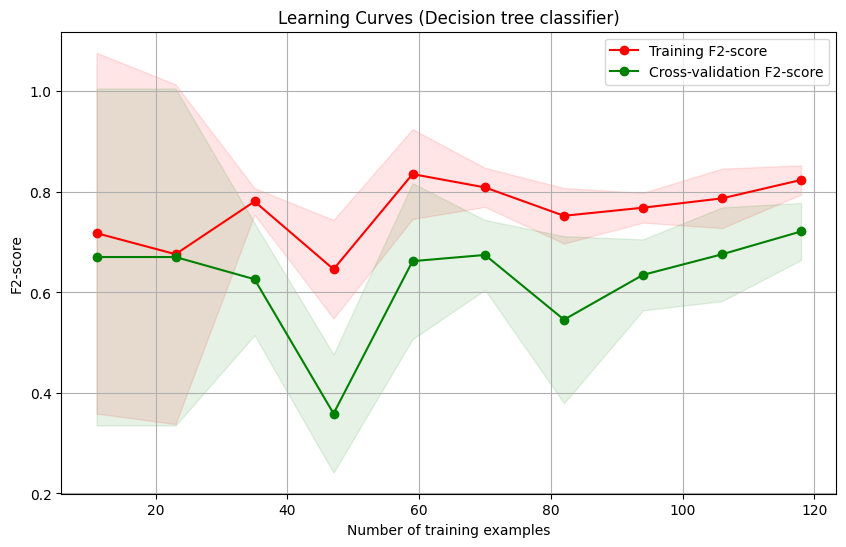

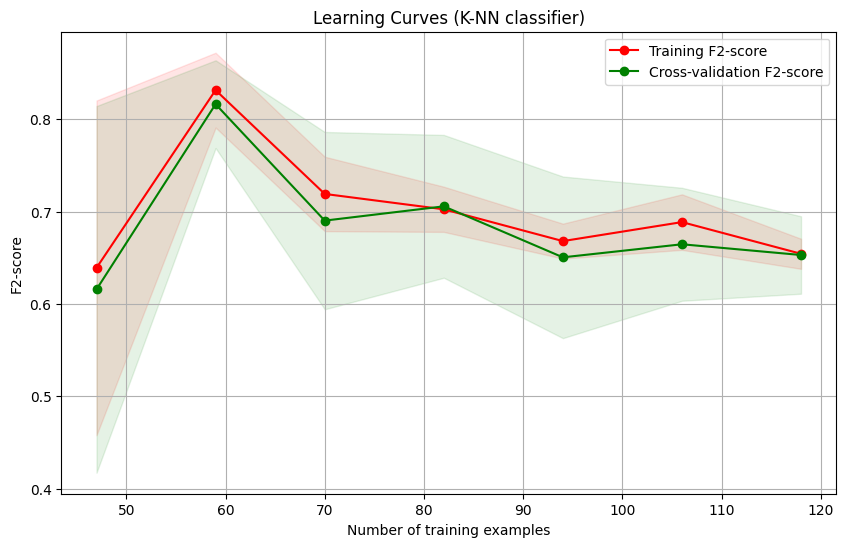

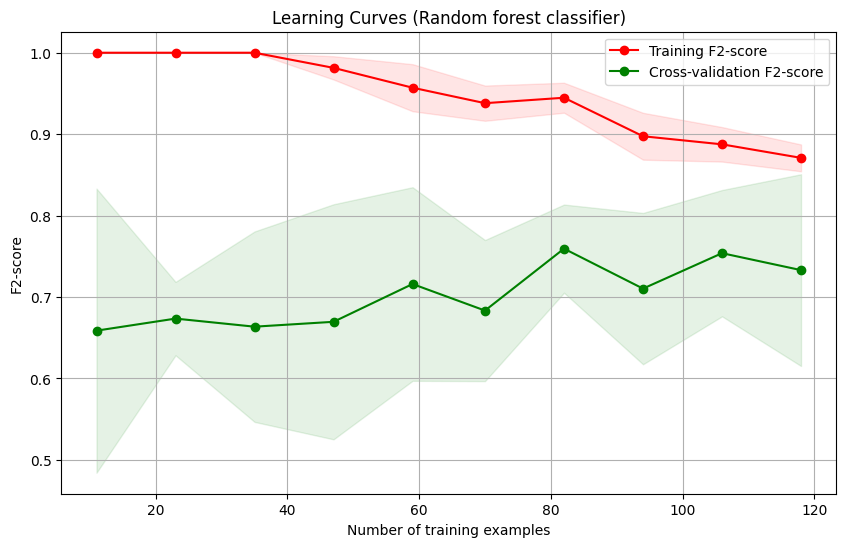

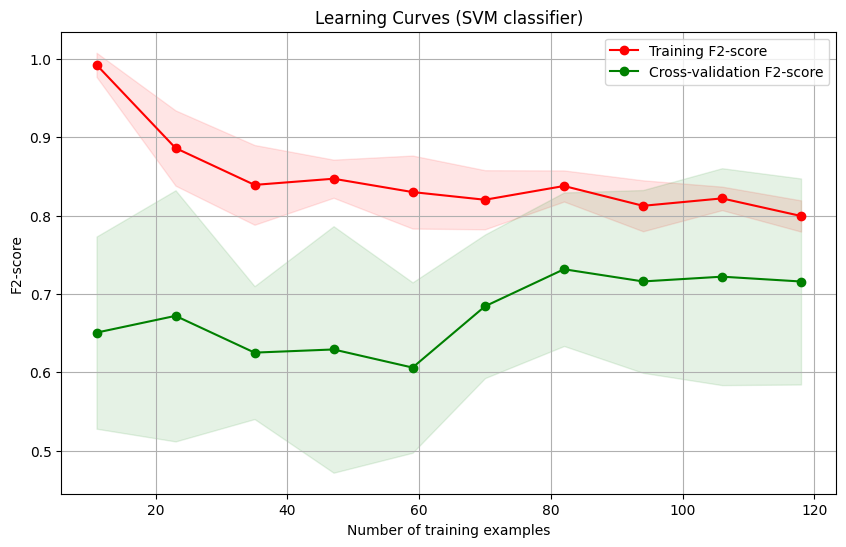

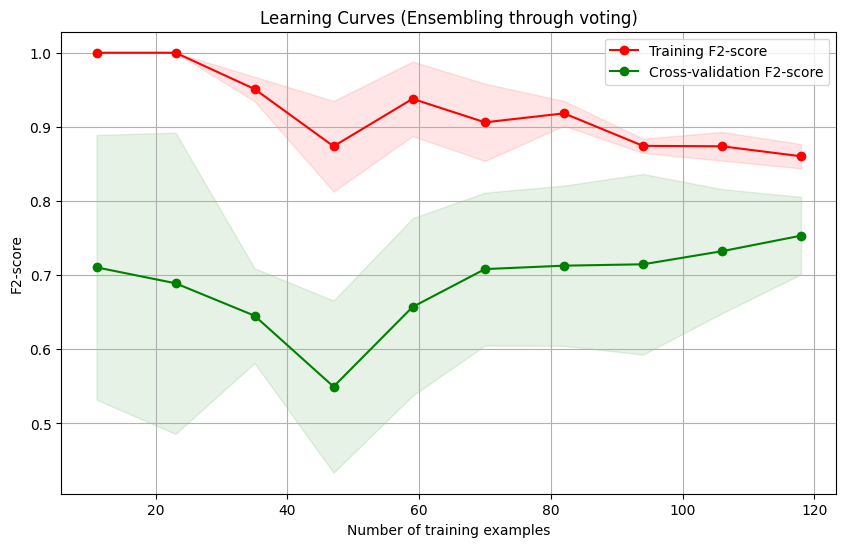

+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                        |      Accuracy      |     Precision      |       Recall       |      F2 score      |      ROC AUC       |
+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  KNeighborsClassifier  | 0.6551724137931034 | 0.6574453242835595 | 0.6552380952380952 | 0.6547421071105282 | 0.7016190476190476 |
| DecisionTreeClassifier | 0.6485057471264367 | 0.6532946950710108 | 0.6342857142857142 | 0.733966683333772  | 0.6522539682539683 |
| RandomForestClassifier | 0.6894252873563218 | 0.696311301787308  | 0.7104761904761905 | 0.7361137237058313 | 0.7321904761904762 |
|          SVC           | 0.7096551724137932 | 0.7112812432665374 | 0.7095238095238094 | 0.7158170703592477 | 0.7967619047619048 |
|    VotingClassifier    | 0.7032183908045977 | 0.7072890495297617 | 0.68857

In [156]:
# Pre-processing
X_train = delete_zeros(X_train)
outliers_total = define_outliers(X_train)
print(f'In total there are {outliers_total} outliers')
X_train_scaled = scaling(X_train)
X_train_var = zero_variance(X_train_scaled)
X_train_anova = anova_analysis(X_train_var, Y_train)
X_train_rfecv, feature_names = function_calc_RFECV(X_train_anova,Y_train)
Y_train_encoded = label_encoder(Y_train)

# Classifiers
RSCV_KNN, KNN_classifier = KNN(X_train_rfecv, Y_train_encoded)
RSCV_DTC, DTC_classifier = DTC(X_train_rfecv, Y_train_encoded)
RSCV_RF, RF_classifier = RFC(X_train_rfecv, Y_train_encoded)
RSCV_SVM, SVM_classifier = SVM(X_train_rfecv, Y_train_encoded)
voting_classifier = voting(X_train_rfecv, Y_train_encoded)

# Learning curves
# Create a list with all the classifiers
classifiers = {'Decision tree classifier': DTC_classifier, 'K-NN classifier': KNN_classifier, 'Random forest classifier': RF_classifier, 'SVM classifier': SVM_classifier, 'Ensembling through voting': voting_classifier}

# Plot the learning curve for each classifier
for name, clf in classifiers.items():
  title = f"Learning Curves ({name})"
  plot_learning_curve(clf, title, X_train_rfecv, Y_train_encoded, cv=cv)
  plt.show()

# Create a table with all the metrics of the classifiers performed on the training set
metrics([KNN_classifier, DTC_classifier, RF_classifier, SVM_classifier, voting_classifier], X_train_rfecv, Y_train_encoded)

## Performing functions on test set

Coded classes: ['benign' 'malignant']
+------------------+--------------------+--------------------+--------+--------------------+---------+
|                  |      Accuracy      |     Precision      | Recall |      F2 score      | ROC AUC |
+------------------+--------------------+--------------------+--------+--------------------+---------+
| VotingClassifier | 0.7392857142857143 | 0.7616666666666667 | 0.775  | 0.7492063492063492 |   nan   |
+------------------+--------------------+--------------------+--------+--------------------+---------+


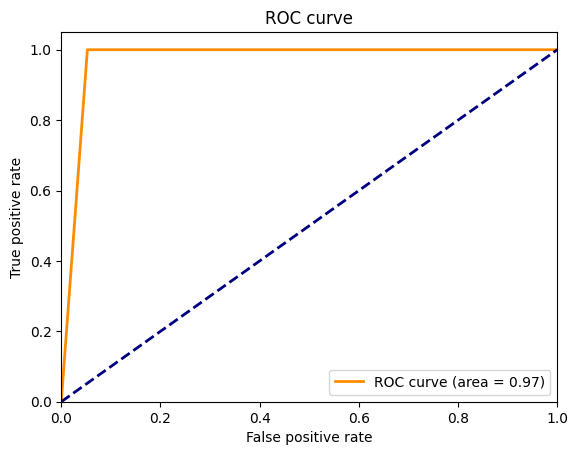

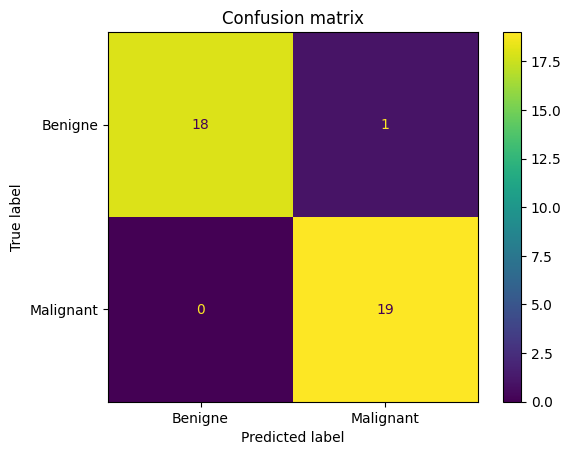

In [175]:
X_test_scaled = scaling(X_test)
Y_test_encoded = label_encoder(Y_test)

# Select the right columns based on the selected columns in the pre-processing of the train set
X_test_useful_features = X_test_scaled[feature_names]

# Perform the best performing classifier on test set
voting_classifier = voting(X_test_useful_features, Y_test_encoded)

# Create a table with all the metrics of the classifiers performed on the training set
clf = [voting_classifier]
metrics(clf, X_test_useful_features, Y_test_encoded)

# ROC curve plotten
Y_pred_voting = voting_classifier.predict(X_test_useful_features)
plot_roc_curve(Y_pred_voting, Y_test_encoded)

# Creating a confusion matrix
determine_confusion_matrix(Y_test_encoded, Y_pred_voting)